<a href="https://colab.research.google.com/github/MonosUna/LaboratoryWorkPython2023/blob/dev/Copy_of_lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [56]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [57]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [58]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [59]:
# your code here
vacancies = dict()

def add_vacancies(current_job):
  vacancies[current_job] = []
  params = {
      'text': current_job,
      'area': 1,
      'page': 0,
      'per_page': 20
  }
  data = requests.get(URL, params).json()
  sleep(0.3)
  for i in range(data['pages']):
    params = {
      'text': current_job,
      'area': 1,
      'page': i,
      'per_page': 20
    }
    data = requests.get(URL, params).json()
    if i == data['pages'] - 1:
      for j in range(data['found'] % 20):
        vacancies[current_job].append(data['items'][j])
    else:
      for j in range(20):
        vacancies[current_job].append(data['items'][j])
    sleep(0.3)

add_vacancies('Доктор')
add_vacancies('Уборщик')
add_vacancies('Капитан')
add_vacancies('Аниматор')
add_vacancies('Плотник')


(1 балл) Посчитайте сколько всего найдено вакансий:

In [60]:
# your code here
print(len(vacancies['Доктор']) +
len(vacancies['Уборщик']) + 
len(vacancies['Капитан']) +
len(vacancies['Аниматор']) +
len(vacancies['Плотник']))

3690


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [61]:
class Company:
    # your code here
    name = ""
    latitude = 0.0
    longitude = 0.0
    def __init__(self, name, y, x):
      self.name = name
      self.latitude = y
      self.longitude = x 
    

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [62]:
# your code here
companies = []

def add_companies(parameter):
  for i in vacancies[parameter]:
    name = i['employer']['name']
    if i['address'] == None:
      lat = None
      lng = None
    else:
      lat = i['address']['lat']
      lng = i['address']['lng']
    companies.append(Company(name, lat, lng))

add_companies('Доктор')
add_companies('Уборщик')
add_companies('Капитан')
add_companies('Аниматор')
add_companies('Плотник')


(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [63]:
# your code here
count = 0

for i in companies:
  if not(i.latitude == None and i.longitude == None):
    count += 1

print(count)


2618


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [64]:
# your code here
import math
inMSK = []

centre_lat =  55.7522200
centre_lng =  37.6155600

def search_in_MSK(parameter):
  for i in vacancies[parameter]:
    if i['address'] == None:
      continue
    else:
      lat = i['address']['lat']
      lng = i['address']['lng']
    if lat == None or lng == None:
      continue
    if (((math.fabs(lng - centre_lng)*64)**2 + (math.fabs(lat - centre_lat)*113)**2)**0.5) < 18:
      inMSK.append(i)

search_in_MSK('Доктор')
search_in_MSK('Уборщик')
search_in_MSK('Капитан')
search_in_MSK('Аниматор')
search_in_MSK('Плотник')

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

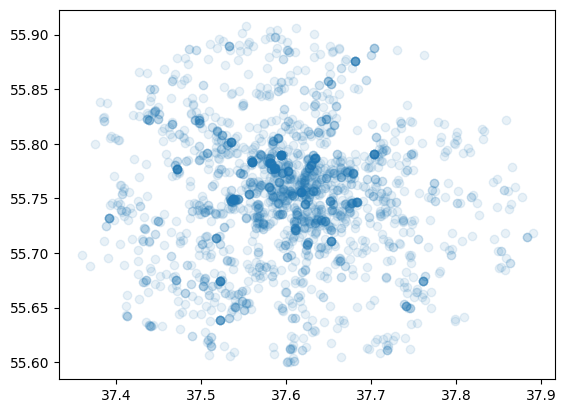

In [65]:
# your code here
x = []
y = []

for i in inMSK:
  x.append(i['address']['lng'])
  y.append(i['address']['lat'])

plt.scatter(
    x, 
    y, linewidth=1, alpha=0.1
)
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [66]:
# your code here
new_view_vacancy = []

for i in inMSK:
  if i['salary'] == None:
    new_view_vacancy.append({'Название': i['name'], 'Компания': i['employer']['name'], 'Зарплата': "?", 'Широта': i['address']['lat'], 'Долгота': i['address']['lng']})
    continue
  new_view_vacancy.append({'Название': i['name'], 'Компания': i['employer']['name'], 'Зарплата': i['salary']['from'], 'Широта': i['address']['lat'], 'Долгота': i['address']['lng']})

import plotly.express as px

fig = px.scatter_mapbox(new_view_vacancy, lat="Широта", lon="Долгота", hover_name="Название", hover_data=["Компания", "Зарплата"],
                        color_discrete_sequence=["red"], zoom=10, height=1000, opacity=0.3)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Ваши выводы здесь :)


Видно, что спрос распределился центрированно относительно районов Москвы.. В основном вакансии на уборщика. Большой спрос на них можно видеть в центре и в Москве-Сити. Немного удивило, что зарплаты небольшие, хоть даже работа востребованная и Москва все-таки. Видимо сильно влияет её характер.

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [4]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 86.6MB/s]


Создадим DataFrame:

In [5]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [5]:
# your code here
diamonds.head(5)


,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [19]:
# your code here
len(diamonds)

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [20]:
# your code here

max_value = diamonds['total_sales_price'].max() 
str_with_max_value = diamonds[diamonds['total_sales_price'] == max_value]
new_str = str_with_max_value['total_sales_price']

min_value = diamonds['total_sales_price'].min() 
str_with_min_value = diamonds[diamonds['total_sales_price'] == min_value]
new_str1 = str_with_min_value['total_sales_price']

new_df = pd.concat([new_str1, new_str])
new_df

0             200
1             200
2             200
3             200
4             200
5             200
6             200
7             200
8             200
9             200
10            200
11            200
12            200
13            200
14            200
15            200
16            200
17            200
18            200
19            200
20            200
21            200
22            200
219702    1449881
Name: total_sales_price, dtype: int64

(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [21]:
# your code here
count = 0

for rowIndex, row in diamonds.iterrows(): 
  for columnIndex, value in row.items():
    if str(value) == 'None' or str(value) == 'unknown':
      count += 1

print(count)


1891168


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [22]:
# your code here
column_with_None = []

for rowIndex, row in diamonds.iterrows(): 
  for columnIndex, value in row.items():
    if str(value) == 'None' or str(value) == 'unknown':
      if (columnIndex not in column_with_None):
        column_with_None.append(columnIndex)

print(column_with_None)

['eye_clean', 'culet_condition', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity', 'culet_size', 'girdle_min', 'girdle_max', 'cut_quality', 'color']


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [23]:
# your code here
count = 0

for name, values in diamonds.items ():
 if name.startswith('fancy_color_') or name.startswith('fluor_'):
  count += 1

print(count)

6


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [24]:
# your code here
count = 0 

for rowIndex, row in diamonds.iterrows(): 
  for columnIndex, value in row.items():
    if (columnIndex.startswith('fluor_') or columnIndex.startswith('fancy_color_')):
      if str(value) != 'None' and str(value) != 'unknown':
        count += 1

print(count)


111586


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [6]:
# your code here

diamonds.drop(columns = ['fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity'],axis = 1, inplace=True)
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200


(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [7]:
# your code here
count_of_columns = 0

for name, values in diamonds.items ():
 if name.startswith('culet_'):
  count_of_columns += 1

print(count_of_columns)

count = 0 

for rowIndex, row in diamonds.iterrows(): 
  for columnIndex, value in row.items():
    if (columnIndex.startswith('culet_')):
      if str(value) != 'None' and str(value) != 'unknown':
        count += 1

print(count)

diamonds.drop(columns = ['culet_size', 'culet_condition'],axis = 1, inplace=True)
diamonds.head(5)

2
149282


,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [27]:
# your code here
cost = 0

for rowIndex, row in diamonds.iterrows(): 
  cost += row['total_sales_price']

print(cost / 1000)

1517721.991


Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [28]:
# your code here
diamonds.loc[::2]


,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [29]:
# your code here
diamonds.loc[::6]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [30]:
# your code here
not_a_number = []

for name, values in diamonds.items ():
  # if isinstance(diamonds.loc[1][name], int) or isinstance(diamonds.loc[0][name], float):
  #   continue
  try:
    diamonds.loc[1][name] + 5
  except:
    not_a_number.append(name)


print(not_a_number)
sort_df = diamonds[not_a_number]
sort_df


['cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'girdle_min', 'girdle_max']


,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [35]:
# your code here
matrix = np.array(diamonds['total_sales_price'])
transpose_matrix = np.transpose(matrix)
matrix.dot(transpose_matrix)

158540672665477

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

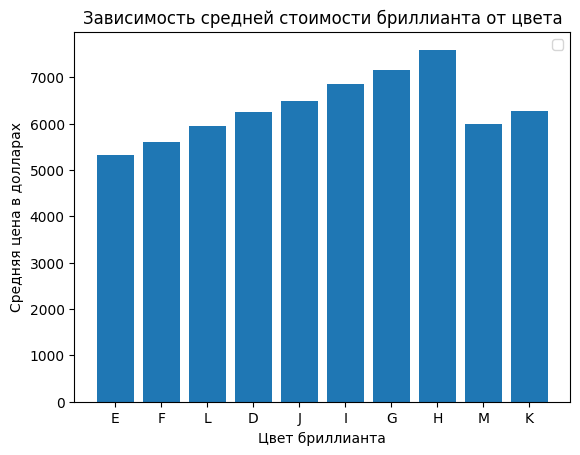

In [36]:
# your code here
average_cost = dict()
counts = dict()

x = []
y = []

for i in range (len(diamonds)):
  if diamonds.loc[i]['color'] == "unknown":
    continue
  if diamonds.loc[i]['color'] not in average_cost:
    average_cost[diamonds.loc[i]['color']] = 0
    counts[diamonds.loc[i]['color']] = 0
  average_cost[diamonds.loc[i]['color']] += diamonds.loc[i]['total_sales_price']
  counts[diamonds.loc[i]['color']] += 1

for i in average_cost.keys():
  average_cost[i] = average_cost[i] / counts[i]
  x.append(i)
  y.append(average_cost[i])

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_ylabel('Средняя цена в долларах')
ax.set_xlabel('Цвет бриллианта')
ax.set_title('Зависимость средней стоимости бриллианта от цвета')
ax.legend(title='')

plt.show()


(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

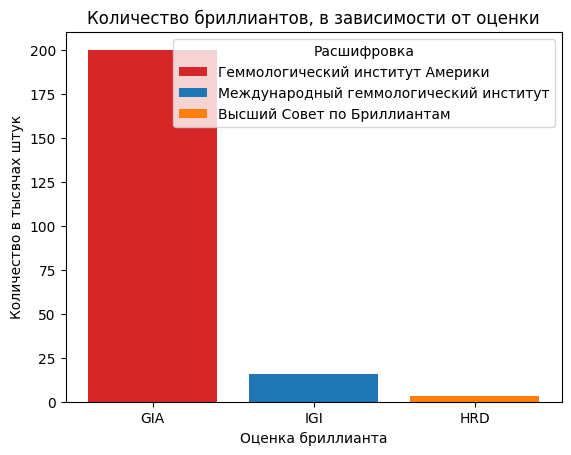

In [37]:
# your code here
counts = dict()

x = []
y = []

counts['GIA'] = 0

for i in range (len(diamonds)):
  if diamonds.loc[i]['lab'] not in counts:
    counts[diamonds.loc[i]['lab']] = 0
  counts[diamonds.loc[i]['lab']] += 1

for i in counts.keys():
  x.append(i)
  y.append(counts[i] / 1000)

fig, ax = plt.subplots()

bar_labels = ['Геммологический институт Америки', 'Международный геммологический институт', 'Высший Совет по Бриллиантам']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
ax.bar(x, y, label=bar_labels, color=bar_colors)

ax.set_ylabel('Количество в тысячах штук')
ax.set_xlabel('Оценка бриллианта')
ax.set_title('Количество бриллиантов, в зависимости от оценки')
ax.legend(title='Расшифровка')

plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

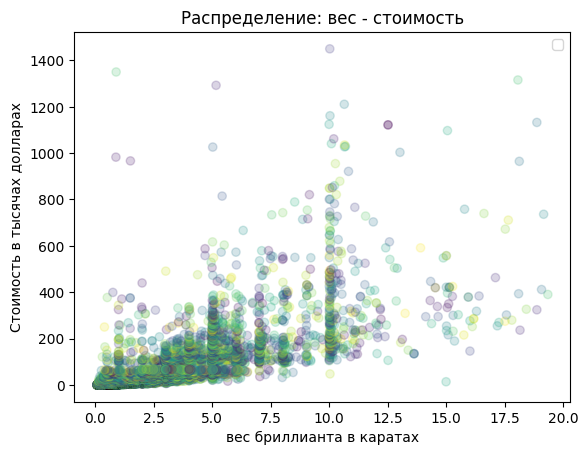

In [38]:
# your code here
x = []
y = []

for i in range (len(diamonds)):
  x.append(diamonds.loc[i]['carat_weight'])
  y.append(diamonds.loc[i]['total_sales_price'] / 1000)

colors = np.random.randint(100, size=(len(diamonds)))

fig, ax = plt.subplots()

ax.set_ylabel('Стоимость в тысячах долларах')
ax.set_xlabel('вес бриллианта в каратах')
ax.set_title('Распределение: вес - стоимость')
ax.legend(title='')

plt.scatter(x, y, linewidth=1, alpha=0.2, c=colors)
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

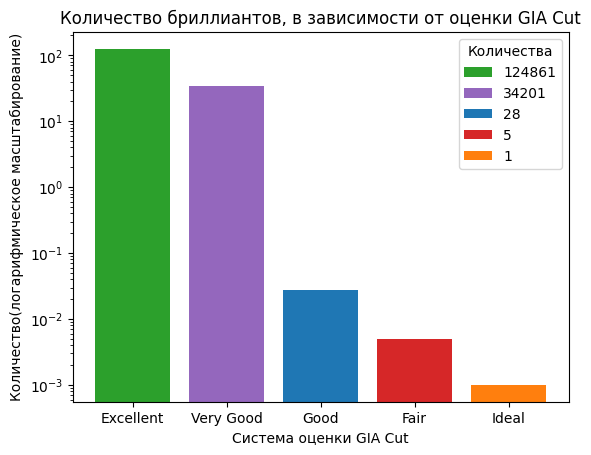

In [39]:
# your code here
counts = dict()

x = []
y = []
bar_colors = ['tab:green', 'tab:purple', 'tab:blue', 'tab:red', 'tab:orange']


for i in range (len(diamonds)):
  if diamonds.loc[i]['cut_quality'] == "unknown":
    continue
  if diamonds.loc[i]['cut_quality'] not in counts:
    counts[diamonds.loc[i]['cut_quality']] = 0
  counts[diamonds.loc[i]['cut_quality']] += 1

bar_labels = []

for i in counts.keys():
  x.append(i)
  y.append(counts[i] / 1000)
  bar_labels.append(counts[i])

fig, ax = plt.subplots()

ax.bar(x, y, color = bar_colors, label=bar_labels)

ax.set_ylabel('Количество(логарифмическое масштабирование)')
ax.set_xlabel('Система оценки GIA Cut')
ax.set_title('Количество бриллиантов, в зависимости от оценки GIA Cut')
ax.legend(title='Количества')

plt.yscale('log')

plt.show()


(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Ваши выводы здесь :)


По графикам выше можно сказать, что вес и цвет не сильно влюияют на цену бриллианта. Можно видеть, что количество отличных бриллиантов очень большое. Основную работу с бриллиантами в мире ведет Геммологический институт Америки, именно он оценил большее число камней, и в нем изобрели систему оценки бриллиантов.


## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [8]:
# your code here
new_columns = ['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']

df = diamonds[new_columns]
df.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [9]:
# your code here
df = df.sample(frac=1, random_state=13).reset_index(drop=True)
df.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,3.88,3.90,2.32,792
1,7.68,4.83,3.20,8939
2,4.84,5.42,3.24,2240
3,4.28,4.31,2.67,1002
4,4.34,4.36,2.71,1064
5,8.70,7.17,5.26,28485
6,4.31,4.34,2.69,960
7,4.27,4.29,2.65,958
8,5.00,5.06,3.17,800
9,6.84,6.88,4.23,5669


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [10]:
# your code here
def calculate_new_column(row):
    return ((abs(row['meas_length'] - row['meas_width'])) ** 3 + (abs(row['meas_length'] - row['meas_depth'])) ** 3 + (abs(row['meas_width'] - row['meas_depth'])) ** 3) ** (1 / 3)

df['sum'] = df.apply(calculate_new_column, axis=1)
df.head(10)

,meas_length,meas_width,meas_depth,total_sales_price,sum
0,3.88,3.90,2.32,792,1.978157
1,7.68,4.83,3.20,8939,4.896475
2,4.84,5.42,3.24,2240,2.446954
3,4.28,4.31,2.67,1002,2.047548
4,4.34,4.36,2.71,1064,2.066348
5,8.70,7.17,5.26,28485,3.714649
6,4.31,4.34,2.69,960,2.060146
7,4.27,4.29,2.65,958,2.053749
8,5.00,5.06,3.17,800,2.344076
9,6.84,6.88,4.23,5669,3.313786


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [11]:
# your code here
new_columns = ['total_sales_price', 'sum']

new_df = df[new_columns]
new_df.head(10)

,total_sales_price,sum
0,792,1.978157
1,8939,4.896475
2,2240,2.446954
3,1002,2.047548
4,1064,2.066348
5,28485,3.714649
6,960,2.060146
7,958,2.053749
8,800,2.344076
9,5669,3.313786


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [12]:
# your code here
train_on_indices = df.sample(frac=0.8, random_state=13).index
train_on_indices = sorted(train_on_indices)

train_df = df.loc[train_on_indices].reset_index(drop=True)
test_df = df.drop(train_on_indices).reset_index(drop=True)
test_df.head(5)

,meas_length,meas_width,meas_depth,total_sales_price,sum
0,3.88,3.90,2.32,792,1.978157
1,4.73,4.76,2.89,2266,2.337308
2,8.50,5.82,3.69,11962,5.194929
3,5.93,3.77,2.41,21600,3.830579
4,4.73,4.75,2.93,1124,2.280527


(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

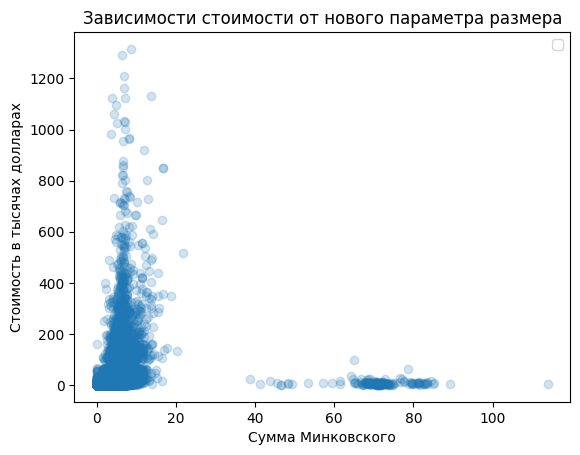

In [78]:
# your code here
x = []
y = []

for i in range (len(train_df)):
  x.append(train_df.loc[i]['sum'])
  y.append(train_df.loc[i]['total_sales_price'] / 1000)

fig, ax = plt.subplots()

ax.set_ylabel('Стоимость в тысячах долларах')
ax.set_xlabel('Сумма Минковского')
ax.set_title('Зависимости стоимости от нового параметра размера')
# ax.legend(title='')

ax.scatter(x, y, linewidth=1, alpha=0.2)
plt.show()


(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

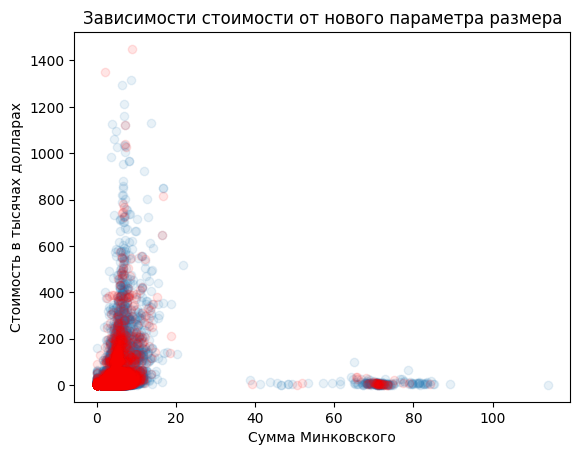

In [84]:
# your code here

fig, ax = plt.subplots()


x = []
y = []

for i in range (len(train_df)):
  x.append(train_df.loc[i]['sum'])
  y.append(train_df.loc[i]['total_sales_price'] / 1000)

new_x = []
new_y = []

for i in range(len(test_df)):
  new_x.append(test_df.loc[i]['sum'])
  new_y.append(test_df.loc[i]['total_sales_price'] / 1000)


ax.set_ylabel('Стоимость в тысячах долларах')
ax.set_xlabel('Сумма Минковского')
ax.set_title('Зависимости стоимости от нового параметра размера')

ax.scatter(x, y, linewidth=1, alpha=0.1)
ax.scatter(new_x, new_y, c='r', linewidth=1, alpha=0.1)


plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [51]:
# your code here

x = []


for i in range(len(test_df)):
  new_df = train_df['sum'] - test_df.loc[i]['sum']
  new_df = abs(new_df)
  x.append(new_df.argmin())
  
test_df['min_dist_to_train'] = x

test_df.head(10)


,meas_length,meas_width,meas_depth,total_sales_price,sum,min_dist_to_train
0,3.88,3.90,2.32,792,1.978157,1844
1,4.73,4.76,2.89,2266,2.337308,4331
2,8.50,5.82,3.69,11962,5.194929,84831
3,5.93,3.77,2.41,21600,3.830579,9228
4,4.73,4.75,2.93,1124,2.280527,153
5,3.67,3.69,2.23,704,1.826973,34
6,4.34,4.37,2.73,1046,2.047548,2
7,9.01,7.79,5.08,49048,4.351830,58222
8,5.29,5.32,3.32,2218,2.501088,3653
9,9.39,6.01,3.52,4264,6.352205,25751


(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [53]:
# your code here
percent = []

for i in range(len(test_df)):
  pos = test_df.loc[i]['min_dist_to_train']
  diff = test_df.loc[i]['total_sales_price'] - train_df.loc[pos]['total_sales_price']
  value = (abs(diff / test_df.loc[i]['total_sales_price'])) * 100
  percent.append(value)

test_df['percent_difference'] = percent

test_df.head(10)


,meas_length,meas_width,meas_depth,total_sales_price,sum,min_dist_to_train,percent_difference
0,3.88,3.90,2.32,792,1.978157,1844,11.616162
1,4.73,4.76,2.89,2266,2.337308,4331,27.007944
2,8.50,5.82,3.69,11962,5.194929,84831,0.000000
3,5.93,3.77,2.41,21600,3.830579,9228,51.791667
4,4.73,4.75,2.93,1124,2.280527,153,4.448399
5,3.67,3.69,2.23,704,1.826973,34,3.977273
6,4.34,4.37,2.73,1046,2.047548,2,4.206501
7,9.01,7.79,5.08,49048,4.351830,58222,98.209917
8,5.29,5.32,3.32,2218,2.501088,3653,79.891794
9,9.39,6.01,3.52,4264,6.352205,25751,421.482176


**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)